SETUP


1.1 Install Dependencies

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 matplotlib

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.4.1
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


2. import dependencies

In [5]:
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

From tensorflow functional API call

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [7]:
#for GPU machines
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True) #enables memory restriction

len(gpus) #no of GPU Machines

0

In [8]:
gpus

[]

3. Paths and Folder Structure

In [9]:
POS_PATH=os.path.join('data','positive') #POSITIVE VERIFICATION IMAGE
NEG_PATH=os.path.join('data','negative')
ANC_PATH=os.path.join('data','anchor')

In [10]:
POS_PATH

'data/positive'

In [11]:
#make directory
os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

FileExistsError: [Errno 17] File exists: 'data/positive'

-----------------------

1. collect Positives and Anchors

In [ ]:
#import kagglehub
#path = kagglehub.dataset_download("jessicali9530/lfw-dataset")
#print("Path to dataset files:", path)

In [ ]:
#move the images IN THE negative data folder

In [12]:
import os

for directory in os.listdir("lfw-deepfunneled1"): 
    dir_path = os.path.join("lfw-deepfunneled1", directory)
    
    if not os.path.isdir(dir_path):
        continue  # skip files like .DS_Store which macOS automatically creates
    
    for file in os.listdir(dir_path):  # loop for multiple images inside the folder
        EX_PATH = os.path.join(dir_path, file)
        NEW_PATH = os.path.join(NEG_PATH, file)


In [14]:
import os

base_dir = "lfw-deepfunneled1"

for directory in os.listdir(base_dir):
    dir_path = os.path.join(base_dir, directory)

    if not os.path.isdir(dir_path):
        continue  # Skip .DS_Store or other files

    for file in os.listdir(dir_path):
        print(os.path.join('lfw-deepfunneled1',directory,file))
        # or do your processing here
        print(os.path.join(NEG_PATH))


lfw-deepfunneled1/Jacky_Cheung/Jacky_Cheung_0001.jpg
data/negative
lfw-deepfunneled1/Bo_Ryan/Bo_Ryan_0002.jpg
data/negative
lfw-deepfunneled1/Bo_Ryan/Bo_Ryan_0001.jpg
data/negative
lfw-deepfunneled1/Agnes_Bruckner/Agnes_Bruckner_0001.jpg
data/negative
lfw-deepfunneled1/Ali_Abbas/Ali_Abbas_0002.jpg
data/negative
lfw-deepfunneled1/Ali_Abbas/Ali_Abbas_0001.jpg
data/negative
lfw-deepfunneled1/Dirk_Kempthorne/Dirk_Kempthorne_0001.jpg
data/negative
lfw-deepfunneled1/Jennifer_Pena/Jennifer_Pena_0001.jpg
data/negative
lfw-deepfunneled1/Stellan_Skarsgard/Stellan_Skarsgard_0002.jpg
data/negative
lfw-deepfunneled1/Stellan_Skarsgard/Stellan_Skarsgard_0001.jpg
data/negative
lfw-deepfunneled1/Jung_Bong/Jung_Bong_0001.jpg
data/negative
lfw-deepfunneled1/Charlie_Deane/Charlie_Deane_0001.jpg
data/negative
lfw-deepfunneled1/Eliza_Dushku/Eliza_Dushku_0001.jpg
data/negative
lfw-deepfunneled1/Bilal_Erdogan/Bilal_Erdogan_0001.jpg
data/negative
lfw-deepfunneled1/Etta_James/Etta_James_0001.jpg
data/negative
l

In [15]:
#for positive images

In [16]:
import uuid  #for generating unique image names

In [17]:
import cv2

# Load OpenCV's pre-trained Haar cascade for face detection- automatic
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face_resized = cv2.resize(face, (250, 250))

        # Show detected face
        cv2.imshow('Face Crop', face_resized)

        # Save anchor or positive
        if cv2.waitKey(1) & 0xFF == ord('a'):
            imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
            cv2.imwrite(imgname, face_resized)

        if cv2.waitKey(1) & 0xFF == ord('p'):
            imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
            cv2.imwrite(imgname, face_resized)

    # Quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 

In [18]:
cap.release()

In [19]:
frame.shape

(720, 1280, 3)

--------------------

In [21]:
#data loader and pre-processing

In [22]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(30)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(30)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(30)

InvalidArgumentError: Expected 'tf.Tensor(False, shape=(), dtype=bool)' to be true. Summarized data: b'No files matched pattern: data/anchor\\*.jpg'

In [26]:
import glob
print(glob.glob(ANC_PATH + '/*.jpg'))  # should list image paths


['data/anchor/0a73bcdc-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/207a4c26-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/238e7ba8-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/1f2ac832-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/0a5f3078-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/09efba68-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/22b90158-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/233d096c-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/0b68164c-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/1ff1204a-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/0b905184-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/04170a06-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/1f536986-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/0b0c6568-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/0b9a808c-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/0a920bd8-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/05357526-412e-11f0-8b34-0648fcf42c1c.jpg', 'data/anchor/0c755252-412e-11f0-8b34-0648fcf42c

In [48]:
#create a dataset of file paths that match a given file pattern (such as '*.jpg' or 'data/*.tfrecord').
anchor = tf.data.Dataset.list_files(ANC_PATH + '/*.jpg').take(30)
positive = tf.data.Dataset.list_files(POS_PATH + '/*.jpg').take(30)
negative = tf.data.Dataset.list_files(NEG_PATH + '/*.jpg').take(30)

In [28]:
dir_test = anchor.as_numpy_iterator()

In [29]:
print(dir_test.next())

b'data/anchor/0a73bcdc-412e-11f0-8b34-0648fcf42c1c.jpg'


In [74]:
def preprocess(file_path):
    
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image 
    img = tf.io.decode_jpeg(byte_img)
    
    # Preprocessing steps - resizing the image to be 100x100x3
    img = tf.image.resize(img, (100,100))
    # Scale image to be between 0 and 1 
    img = img / 255.0

    # Return image
    return img

In [75]:
img=preprocess(b'data/anchor/0a73bcdc-412e-11f0-8b34-0648fcf42c1c.jpg')

In [76]:
print(img)

tf.Tensor(
[[[0.5492647  0.7872549  0.7762255 ]
  [0.52254903 0.7323529  0.7107843 ]
  [0.5176471  0.6764706  0.654902  ]
  ...
  [0.6004902  0.5122549  0.47009805]
  [0.60563725 0.5115196  0.47230393]
  [0.60857844 0.5144608  0.4752451 ]]

 [[0.55539215 0.7830882  0.77892154]
  [0.535049   0.7375     0.71666664]
  [0.5362745  0.702451   0.67720586]
  ...
  [0.6066176  0.51740193 0.47818628]
  [0.5892157  0.49485293 0.45637256]
  [0.60269606 0.5085784  0.46936274]]

 [[0.58480394 0.7970588  0.7987745 ]
  [0.54313725 0.7382353  0.7254902 ]
  [0.53406864 0.70465684 0.67720586]
  ...
  [0.597549   0.50539213 0.475     ]
  [0.6046569  0.5095588  0.4732843 ]
  [0.5995098  0.50539213 0.46617648]]

 ...

 [[0.5661765  0.8154412  0.7794118 ]
  [0.6019608  0.84313726 0.79901963]
  [0.6105392  0.8536765  0.8041667 ]
  ...
  [0.7139706  0.93235296 0.8752451 ]
  [0.7585784  0.9703431  0.91544116]
  [0.7615196  0.9732843  0.9193627 ]]

 [[0.5806373  0.8276961  0.79240197]
  [0.5995098  0.84068626 0

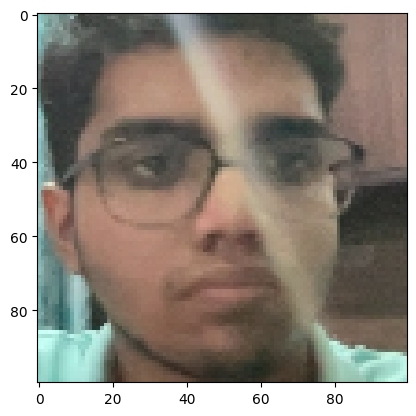

In [77]:
plt.imshow(img)

In [78]:
img.numpy().max()

np.float32(1.0)

In [79]:
img.numpy().min()

np.float32(0.105882354)

In [80]:
#creating labelled dataset

In [81]:
tf.ones(len(anchor))

<tf.Tensor: shape=(30,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [82]:
tf.zeros(len(anchor))

<tf.Tensor: shape=(30,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [83]:
positives = tf.data.Dataset.zip((  #Zip each dataset with its pair and corresponding label
    anchor, 
    positive, 
    tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))  # Create labels: 1 for positive pair (same person),
))

negatives = tf.data.Dataset.zip((
    anchor, 
    negative, 
    tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor))) # 0 for negative pair (different person)
))


In [84]:
data=positives.concatenate(negatives)

In [85]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [86]:
samples=data.as_numpy_iterator()

In [87]:
example=samples.next()

In [88]:
print(example)

(b'data/anchor/09efba68-412e-11f0-8b34-0648fcf42c1c.jpg', b'data/positive/ad21e76a-412e-11f0-8b34-0648fcf42c1c.jpg', np.float32(1.0))


In [89]:
#building train and test partition

In [90]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

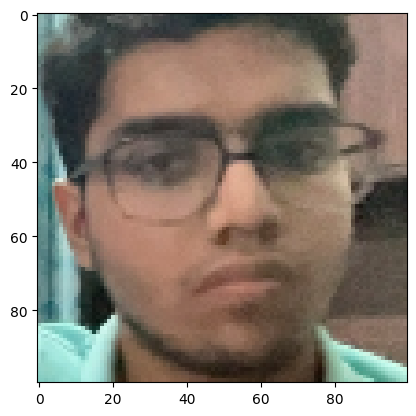

In [91]:
res = preprocess_twin(*example)
plt.imshow(res[1])

In [92]:
len(res)

3

In [93]:
res[1]

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.5328431 , 0.6936275 , 0.6622549 ],
        [0.54558825, 0.6970588 , 0.67965686],
        [0.48602942, 0.6213235 , 0.6230392 ],
        ...,
        [0.67965686, 0.5659314 , 0.53455883],
        [0.6745098 , 0.56078434, 0.5294118 ],
        [0.6933824 , 0.5835784 , 0.54044116]],

       [[0.54289216, 0.6933824 , 0.6666667 ],
        [0.5509804 , 0.6987745 , 0.6848039 ],
        [0.4779412 , 0.61838233, 0.61838233],
        ...,
        [0.65857846, 0.54558825, 0.5120098 ],
        [0.6487745 , 0.535049  , 0.5036765 ],
        [0.6990196 , 0.5882353 , 0.5480392 ]],

       [[0.5561274 , 0.6904412 , 0.68357843],
        [0.5593137 , 0.7026961 , 0.6960784 ],
        [0.49485293, 0.64705884, 0.64460784],
        ...,
        [0.6620098 , 0.55196077, 0.5095588 ],
        [0.66789216, 0.55490196, 0.5213235 ],
        [0.6840686 , 0.57034314, 0.5389706 ]],

       ...,

       [[0.5512255 , 0.81985295, 0.7767157 ],
        [0.56

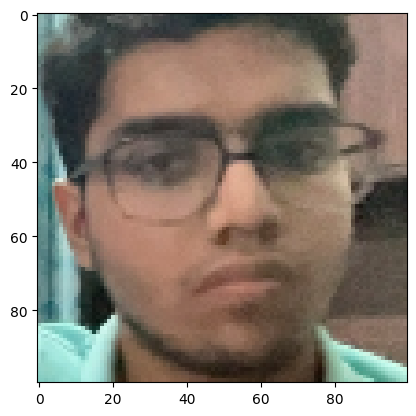

In [94]:
plt.imshow(res[1])

In [95]:
res[2]

np.float32(1.0)

In [96]:
res[1]

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.5328431 , 0.6936275 , 0.6622549 ],
        [0.54558825, 0.6970588 , 0.67965686],
        [0.48602942, 0.6213235 , 0.6230392 ],
        ...,
        [0.67965686, 0.5659314 , 0.53455883],
        [0.6745098 , 0.56078434, 0.5294118 ],
        [0.6933824 , 0.5835784 , 0.54044116]],

       [[0.54289216, 0.6933824 , 0.6666667 ],
        [0.5509804 , 0.6987745 , 0.6848039 ],
        [0.4779412 , 0.61838233, 0.61838233],
        ...,
        [0.65857846, 0.54558825, 0.5120098 ],
        [0.6487745 , 0.535049  , 0.5036765 ],
        [0.6990196 , 0.5882353 , 0.5480392 ]],

       [[0.5561274 , 0.6904412 , 0.68357843],
        [0.5593137 , 0.7026961 , 0.6960784 ],
        [0.49485293, 0.64705884, 0.64460784],
        ...,
        [0.6620098 , 0.55196077, 0.5095588 ],
        [0.66789216, 0.55490196, 0.5213235 ],
        [0.6840686 , 0.57034314, 0.5389706 ]],

       ...,

       [[0.5512255 , 0.81985295, 0.7767157 ],
        [0.56

In [97]:
res[0] #preprocess(input_img)

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.5627451 , 0.6490196 , 0.6372549 ],
        [0.5828431 , 0.6691176 , 0.6573529 ],
        [0.56936276, 0.65563726, 0.64387256],
        ...,
        [0.67156863, 0.5421569 , 0.50686276],
        [0.6598039 , 0.527451  , 0.49215686],
        [0.6517157 , 0.5262255 , 0.48308823]],

       [[0.5107843 , 0.6009804 , 0.577451  ],
        [0.5627451 , 0.652451  , 0.62916666],
        [0.55269605, 0.64093137, 0.61838233],
        ...,
        [0.66838235, 0.5411765 , 0.50514704],
        [0.6661765 , 0.5367647 , 0.50147057],
        [0.6664216 , 0.54093134, 0.49779412]],

       [[0.4762255 , 0.5605392 , 0.53406864],
        [0.5348039 , 0.61715686, 0.59166664],
        [0.54387254, 0.62034315, 0.5977941 ],
        ...,
        [0.65563726, 0.5372549 , 0.4982843 ],
        [0.67009807, 0.54289216, 0.50686276],
        [0.6698529 , 0.5443627 , 0.5012255 ]],

       ...,

       [[0.5240196 , 0.7970588 , 0.75392157],
        [0.47

In [98]:
# Build dataloader pipeline
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024) #to create a mixed sample


In [101]:
samples=data.as_numpy_iterator()

In [102]:
len(samples.next())

3

In [123]:
sam=samples.next()

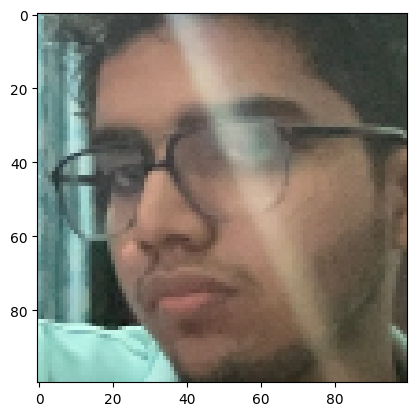

In [124]:
plt.imshow(sam[0])

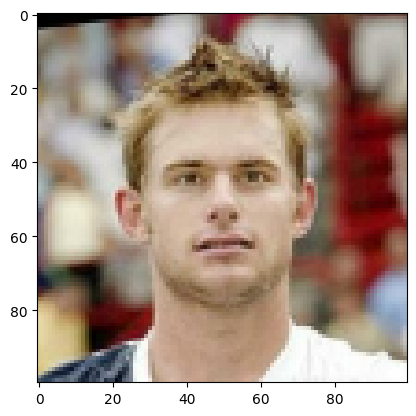

In [125]:
plt.imshow(sam[1])

In [126]:
sam[2]

np.float32(0.0)

In [139]:
samp=samples.next()

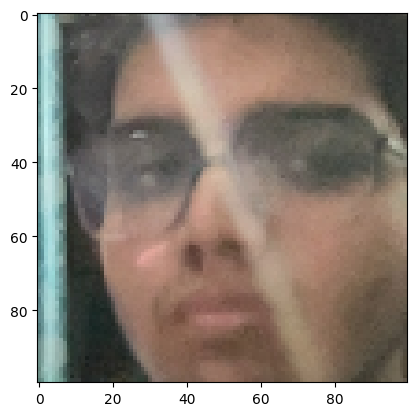

In [140]:
plt.imshow(samp[0])

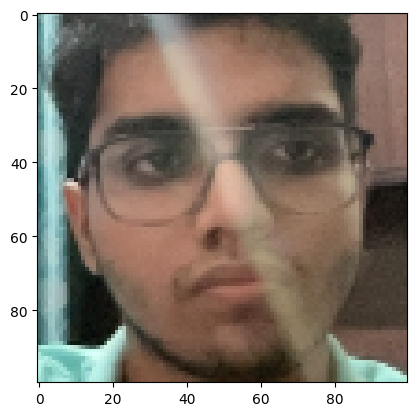

In [141]:
plt.imshow(samp[1])

In [142]:
samp[2]

np.float32(1.0)

In [99]:
# Training partition
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)


In [100]:
# Testing partition
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

----------------

In [143]:
#Building Model

In [ ]:
def make_embedding(): 
    inp = Input(shape=(100,100,3), name='input_image')
    
    # First block
    c1 = Conv2D(64, (10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2,2), padding='same')(c1)
    
    # Second block
    c2 = Conv2D(128, (7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2,2), padding='same')(c2)
    
    # Third block 
    c3 = Conv2D(128, (4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2,2), padding='same')(c3)
    
    # Final embedding block
    c4 = Conv2D(256, (4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [ ]:
embedding = make_embedding()

In [ ]:
embedding.summary()

In [ ]:
#Building Distance Layer

In [ ]:
# Siamese L1 Distance class
class L1Dist(Layer):
    
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
       
    # Magic happens here - similarity calculation
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)
l1 = L1Dist()
l1(anchor_embedding, validation_embedding)

In [ ]:
#Making the Siamese Model

In [ ]:
input_image = Input(name='input_img', shape=(100,100,3))
validation_image = Input(name='validation_img', shape=(100,100,3))
inp_embedding = embedding(input_image)
val_embedding = embedding(validation_image)
siamese_layer = L1Dist()
distances = siamese_layer(inp_embedding, val_embedding)
classifier = Dense(1, activation='sigmoid')(distances)
classifier
<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_6')>
siamese_network = Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')
siamese_network.summary()

In [ ]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(100,100,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(100,100,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [ ]:
siamese_model = make_siamese_model()
siamese_model.summary()

In [ ]:
#Training

In [ ]:
binary_cross_loss = tf.losses.BinaryCrossentropy()
opt = tf.keras.optimizers.Adam(1e-4)

In [ ]:
#setting checkpoints

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=opt, siamese_model=siamese_model)

In [ ]:
#Build Train Step Function

In [ ]:
test_batch = train_data.as_numpy_iterator()
batch_1 = test_batch.next()
X = batch_1[:2]
y = batch_1[2]
y

In [ ]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

In [ ]:
#Training Loop

In [ ]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

In [ ]:
EPOCHS = 50
train(train_data, EPOCHS)

In [ ]:
#Model Evaluation

In [ ]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
# Get a batch of test data
test_input, test_val, y_true = test_data.as_numpy_iterator().next()
y_hat = siamese_model.predict([test_input, test_val])
# Post processing the results 
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

In [ ]:
#Metric Calculations

In [ ]:
# Creating a metric object 
m = Recall()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

In [ ]:
# Creating a metric object 
m = Precision()

# Calculating the recall value 
m.update_state(y_true, y_hat)

# Return Recall Result
m.result().numpy()

In [ ]:
r = Recall()
p = Precision()

for test_input, test_val, y_true in test_data.as_numpy_iterator():
    yhat = siamese_model.predict([test_input, test_val])
    r.update_state(y_true, yhat)
    p.update_state(y_true,yhat) 

print(r.result().numpy(), p.result().numpy())

In [ ]:
#Results Visualization

In [ ]:
# Set plot size 
plt.figure(figsize=(10,8))

# Set first subplot
plt.subplot(1,2,1)
plt.imshow(test_input[0])

# Set second subplot
plt.subplot(1,2,2)
plt.imshow(test_val[0])

# Renders cleanly
plt.show()

In [ ]:
#Model Saving

# Save weights
siamese_model.save('siamesemodelv2.h5')
L1Dist
# Reload model 
siamese_model = tf.keras.models.load_model('siamesemodelv2.h5', 
                                   custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

In [ ]:
# View model summary
siamese_model.summary()

In [ ]:
#Real-time verification Test

In [ ]:
application_data\verification_images
os.listdir(os.path.join('application_data', 'verification_images'))
os.path.join('application_data', 'input_image', 'input_image.jpg')
for image in os.listdir(os.path.join('application_data', 'verification_images')):
    validation_img = os.path.join('application_data', 'verification_images', image)
    print(validation_img)
def verify(model, detection_threshold, verification_threshold):
    # Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        # Make Predictions 
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
    
    # Detection Threshold: Metric above which a prediciton is considered positive 
    detection = np.sum(np.array(results) > detection_threshold)
    
    # Verification Threshold: Proportion of positive predictions / total positive samples 
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images'))) 
    verified = verification > verification_threshold
    
    return results, verified

In [ ]:
#OpenCV Real-time verification

In [ ]:
cap = cv2.VideoCapture(4)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
#         hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         h, s, v = cv2.split(hsv)

#         lim = 255 - 10
#         v[v > lim] = 255
#         v[v <= lim] -= 10
        
#         final_hsv = cv2.merge((h, s, v))
#         img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)

        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        # Run verification
        results, verified = verify(siamese_model, 0.5, 0.5)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
np.sum(np.squeeze(results) > 0.9)

In [ ]:
results